In [1]:
! pip3 install -q findspark
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.master("local[*]").appName("clustername").getOrCreate()
spark

In [6]:
df=spark.read.format("csv").load("CompleteDataset.csv",inferSchema=True,header=True)
df.show(1)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|

In [13]:
# How many partitions ?
print(df.rdd.getNumPartitions())
# Note
# Here we need to convert to RDD from data frame to get the num of partitions

1


In [7]:
# Increases or Dcreases the partition in DF
df2 = df.repartition(4)
df2.rdd.getNumPartitions()

4

In [10]:
#Show Df
# df2.show(1)

In [11]:
# Rename Columns and 
df2.withColumnRenamed("_c0","Id") \
    .withColumnRenamed("Ball Control","Ball_Control")
df2.show()

+----+---------------+---+--------------------+-----------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|           Name|Age|               Photo|Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

### Transformation

In [12]:
#Transformation (select)

df2.select("Name","Overall").distinct().show()


+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|           J. John|     70|
|      M. Mohammadi|     73|
|       A. Mercelán|     70|
|         A. Benali|     72|
|       J. Cuadrado|     82|
|     L. Pellegrini|     77|
|        Pere Milla|     69|
|          I. Saadi|     73|
|              Kanu|     58|
|     N. Castrillón|     57|
|     E. Latte Lath|     63|
|     L. Candellone|     62|
|    R. Cornthwaite|     66|
|          L. Erwin|     64|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|      Bruno Wilson|     66|
|          J. Baffo|     69|
|      A. Granqvist|     80|
+------------------+-------+
only showing top 20 rows



In [13]:
#Transformation (filter)

df2.filter(df2["Overall"]>70).show()

+----+---------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|           Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK div

In [14]:
df2.select("Overall","Name","Age").filter(df2["Overall"]>70).show()

+-------+------------+---+
|Overall|        Name|Age|
+-------+------------+---+
|     71|  D. Cabrera| 27|
|     74| Enaldo Praz| 29|
|     81| M. Brozović| 24|
|     77|  Juan Jesus| 26|
|     78| R. Karsdorp| 22|
|     71|  R. Baderos| 25|
|     71| D. Ndongala| 26|
|     77|       Jonny| 23|
|     77|   T. Rincón| 29|
|     73|    K. Fatai| 27|
|     74|    J. Meram| 28|
|     72|   M. Mariga| 30|
|     71|   C. Janker| 32|
|     72|  A. Faurlín| 30|
|     75| C. Abridego| 25|
|     71|        Sami| 28|
|     75|    R. Babel| 30|
|     75|P. Cannavaro| 36|
|     75|  Trashorras| 36|
|     80|      Sidnei| 27|
+-------+------------+---+
only showing top 20 rows



In [15]:
df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age").show()

+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



### Visulize the results

In [16]:
df2_result = df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age")

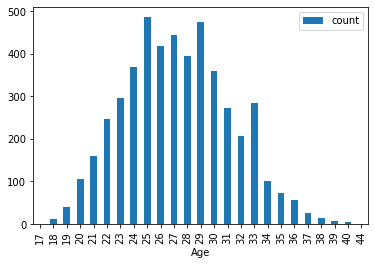

In [18]:
pandas_df=df2_result.toPandas()
pandas_df.plot(x="Age",y="count",kind="bar")